<a href="https://colab.research.google.com/github/lalitmendhule/Machine-Learning/blob/main/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


Mean Absolute Error (MAE): 161169.01
Mean Squared Error (MSE): 62959058653.33
Root Mean Squared Error (RMSE): 250916.44


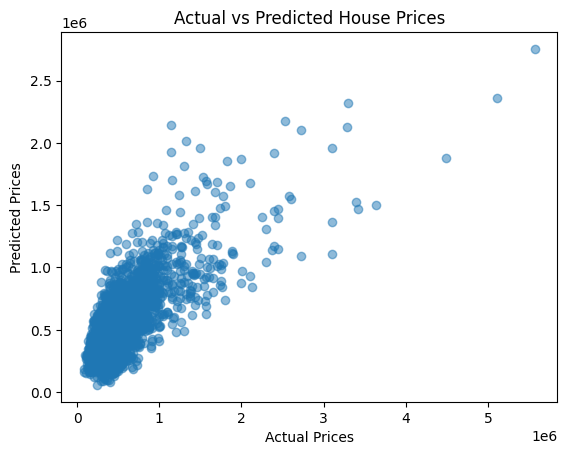

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv("house_prices.csv")  # Ensure the CSV file is in the same directory

# Display basic info
display(df.head())

# Calculate house age
df['house_age'] = 2024 - df['Built Year']

# Define features and target variable
X = df[['living area', 'number of bedrooms', 'house_age']]
y = df['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


K=3: MAE=170764.00, MSE=75354603988.18, RMSE=274507.93
K=5: MAE=162269.36, MSE=67676853006.02, RMSE=260147.75
K=7: MAE=160966.27, MSE=66697804240.53, RMSE=258259.18


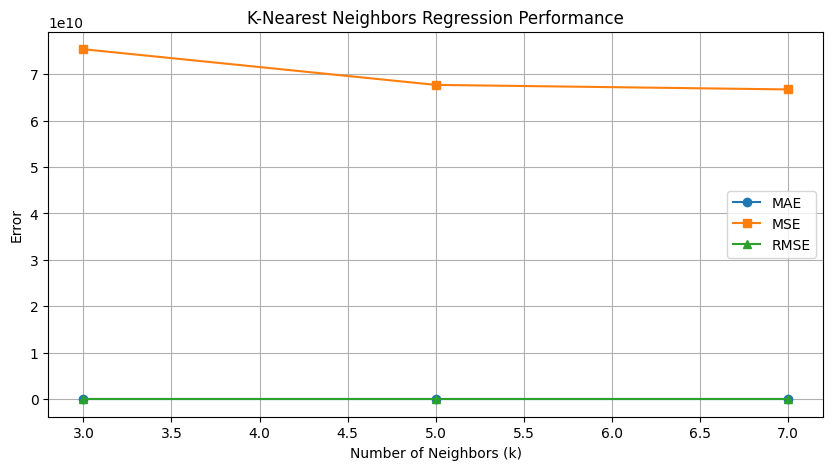

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv("house_prices.csv")  # Ensure the CSV file is in the same directory

# Calculate house age
df['house_age'] = 2024 - df['Built Year']

# Define features and target variable
X = df[['living area', 'number of bedrooms', 'house_age']]
y = df['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with different values of k
k_values = [3, 5, 7]
mae_scores, mse_scores, rmse_scores = [], [], []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

    print(f"K={k}: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}")

# Visualize the relationship between k and model accuracy
plt.figure(figsize=(10,5))
plt.plot(k_values, mae_scores, marker='o', label='MAE')
plt.plot(k_values, mse_scores, marker='s', label='MSE')
plt.plot(k_values, rmse_scores, marker='^', label='RMSE')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error")
plt.title("K-Nearest Neighbors Regression Performance")
plt.legend()
plt.grid()
plt.show()
